<img src="https://pbs.twimg.com/profile_images/1523691369763684357/FPimkdzj_400x400.jpg" align="right" style="float" width="200">
<font color="#0096d2"><h1 align="left">Datamecum: Programa técnico intensivo en data science.</h1></font>
<font color="#00628a"><h2 align="left">Módulo No supervisado</h2></font>
<font color="#00628a"><h2 align="left">Anomalías con Algoritmos</h2></font>

 Utilizamos el conjunto de datos de 'Iris'.


In [2]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor as LOF

In [3]:
# Leemos IRIS
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [4]:
pd.DataFrame(X).head()

0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Vamos a aplicar los algoritmos aprendidos para detectar las flores más anómalas.

# Sklearn

## Isolation Forest

In [18]:
# aplica el algoritmo de sklearn 'isolation forest'

# tengo 10 estimadores y caliento el aprendizaje
clf = IsolationForest(n_estimators = 10, random_state = 16)
clf.fit(X)

# evaluamos el modelo
#y_train_scores = clf.predict(X)
y_train_scores = -clf.score_samples(X)
y_train_scores

array([0.41126814, 0.43303073, 0.46954333, 0.45808544, 0.4197947 ,
       0.52953781, 0.47723259, 0.4170264 , 0.51093064, 0.50183424,
       0.42495287, 0.45166613, 0.49604838, 0.60394364, 0.62181956,
       0.56837537, 0.5186577 , 0.4262628 , 0.55926834, 0.42396902,
       0.49973485, 0.44507512, 0.56824868, 0.49181263, 0.54299818,
       0.45167954, 0.47975915, 0.41383025, 0.43924995, 0.43920563,
       0.46935088, 0.46391268, 0.57409476, 0.50637852, 0.45051017,
       0.49551614, 0.4660595 , 0.49220108, 0.48364746, 0.40918238,
       0.49457347, 0.59172049, 0.49177993, 0.61511936, 0.51320079,
       0.48624051, 0.45279164, 0.43913043, 0.43142197, 0.42112926,
       0.47719639, 0.43211525, 0.43219183, 0.45926396, 0.38265583,
       0.40127427, 0.43297144, 0.56373157, 0.45128054, 0.44829222,
       0.60349921, 0.40573342, 0.48783719, 0.39001682, 0.49853016,
       0.45597146, 0.40588892, 0.43327618, 0.46812117, 0.45275293,
       0.40610475, 0.42985451, 0.43192721, 0.42309304, 0.40256

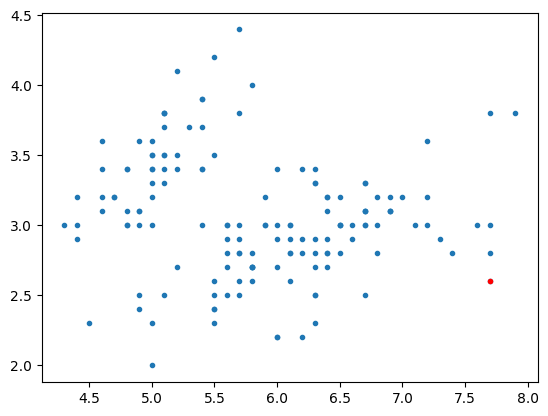

In [19]:
# mostramos los datos y el dato más anómalo para las dos primeras dimensiones
an = np.argmax(y_train_scores)

plt.plot(X[:,0], X[:,1],'.')
plt.plot(X[an,0], X[an,1], 'r.')
plt.show()

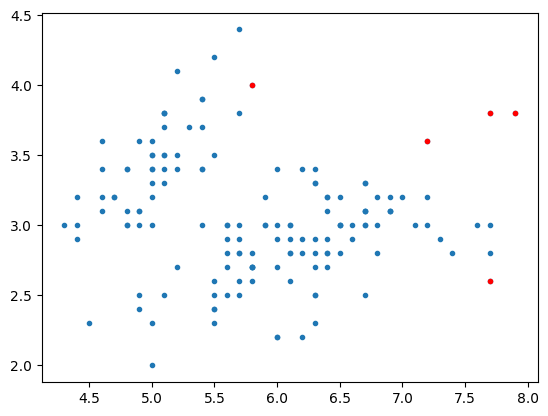

In [22]:
# EJERCICIO: mostramos varias anomalias
N = 5

lista_an = np.argsort(-y_train_scores)[:N]

plt.plot(X[:,0], X[:,1],'.')
plt.plot(X[lista_an,0], X[lista_an,1], 'r.')
plt.show()

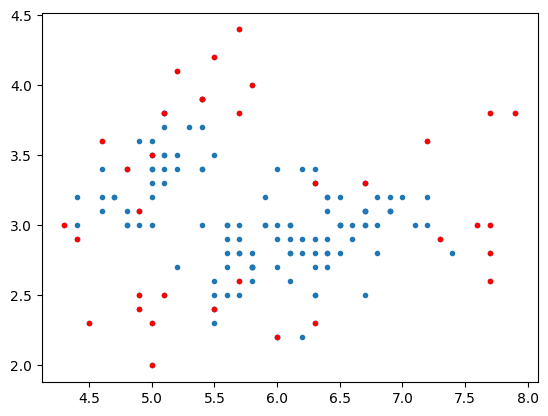

In [24]:
# EJERCICIO: qué hace predict?
y_train_predict = clf.predict(X)

plt.plot(X[:,0], X[:,1],'.')
plt.plot(X[y_train_predict==-1,0], X[y_train_predict==-1,1], 'r.')
plt.show()

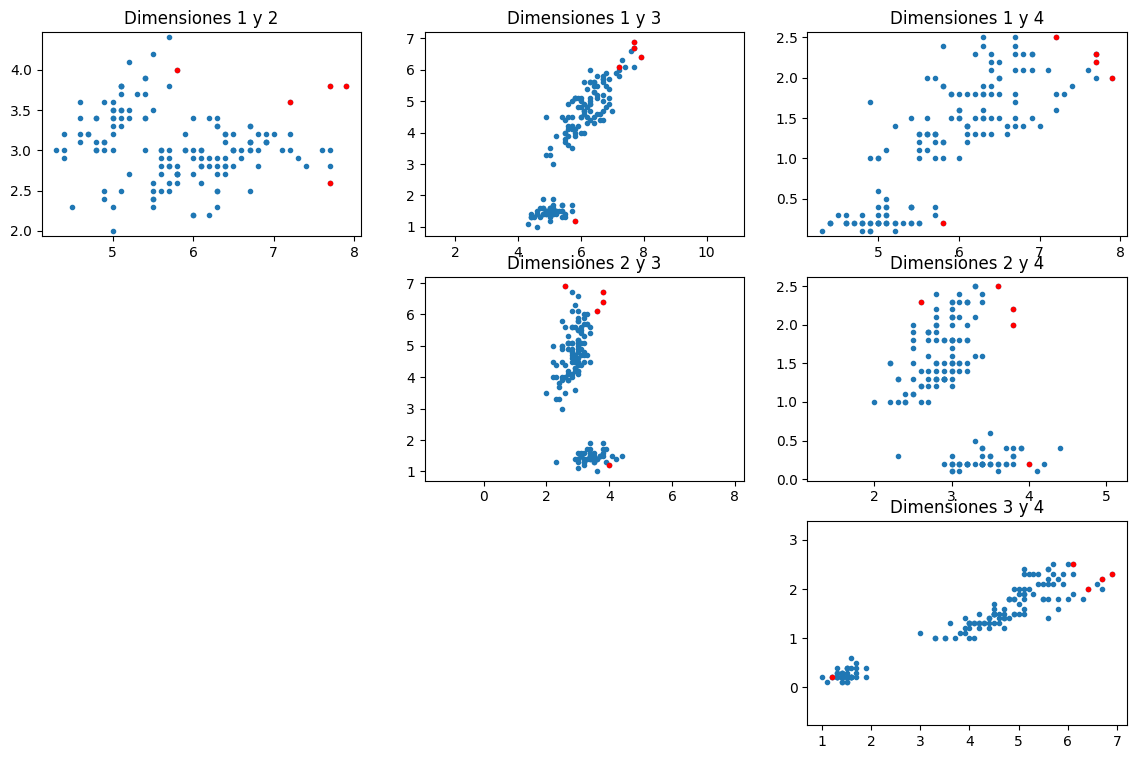

In [27]:
# Mostramos las combinaciones de dimensiones 2 a 2

plt.figure(figsize=(14,9))
plt.subplot(3,3,1), plt.plot(X[:,0],X[:,1],'.'), plt.title('Dimensiones 1 y 2')
plt.subplot(3,3,1), plt.plot(X[lista_an,0],X[lista_an,1],'r.'), plt.title('Dimensiones 1 y 2')
plt.axis('equal')
plt.subplot(3,3,2), plt.plot(X[:,0],X[:,2],'.'), plt.title('Dimensiones 1 y 3')
plt.subplot(3,3,2), plt.plot(X[lista_an,0],X[lista_an,2],'r.'), plt.title('Dimensiones 1 y 3')
plt.axis('equal')
plt.subplot(3,3,3), plt.plot(X[:,0],X[:,3],'.'), plt.title('Dimensiones 1 y 4')
plt.subplot(3,3,3), plt.plot(X[lista_an,0],X[lista_an,3],'r.'), plt.title('Dimensiones 1 y 4')
plt.axis('equal')
plt.subplot(3,3,5), plt.plot(X[:,1],X[:,2],'.'), plt.title('Dimensiones 2 y 3')
plt.subplot(3,3,5), plt.plot(X[lista_an,1],X[lista_an,2],'r.'), plt.title('Dimensiones 2 y 3')
plt.axis('equal')
plt.subplot(3,3,6), plt.plot(X[:,1],X[:,3],'.'), plt.title('Dimensiones 2 y 4')
plt.subplot(3,3,6), plt.plot(X[lista_an,1],X[lista_an,3],'r.'), plt.title('Dimensiones 2 y 4')
plt.axis('equal')
plt.subplot(3,3,9), plt.plot(X[:,2],X[:,3],'.'), plt.title('Dimensiones 3 y 4')
plt.subplot(3,3,9), plt.plot(X[lista_an,2],X[lista_an,3],'r.'), plt.title('Dimensiones 3 y 4')
plt.axis('equal')
plt.show()

## DBSCAN

In [30]:
# aplica el algoritmo DBSCAN
clf = DBSCAN(eps = 0.4, min_samples = 4)

# devuelve el cluster
y_train_scores = clf.fit_predict(X)
y_train_scores

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  3,  1,  1,  3,  1, -1,  1, -1,  1,  1,  1,
       -1,  1,  2,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,
       -1,  1, -1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  3,  1, -1,  2,
        2,  2,  2, -1, -1, -1, -1, -1,  2,  2,  2,  2, -1,  2,  2, -1, -1,
       -1,  2,  2, -1,  2,  2, -1,  2,  2,  2, -1, -1, -1,  2,  2, -1, -1,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2])

In [ ]:
# mostramos los datos y el dato más anómalo para las dos primeras dimensiones


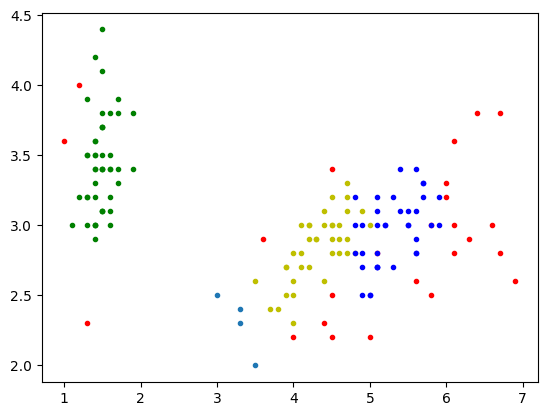

In [34]:
# EJERCICIO: mostramos varias anomalias

#plt.plot(X[:,0], X[:,1],'.')
plt.plot(X[y_train_scores==-1,2], X[y_train_scores==-1,1], 'r.')
plt.plot(X[y_train_scores==0,2], X[y_train_scores==0,1], 'g.')
plt.plot(X[y_train_scores==1,2], X[y_train_scores==1,1], 'y.')
plt.plot(X[y_train_scores==2,2], X[y_train_scores==2,1], 'b.')
plt.plot(X[y_train_scores==3,2], X[y_train_scores==3,1], '.')
plt.show()

(0.705, 7.195, -0.01999999999999999, 2.62)

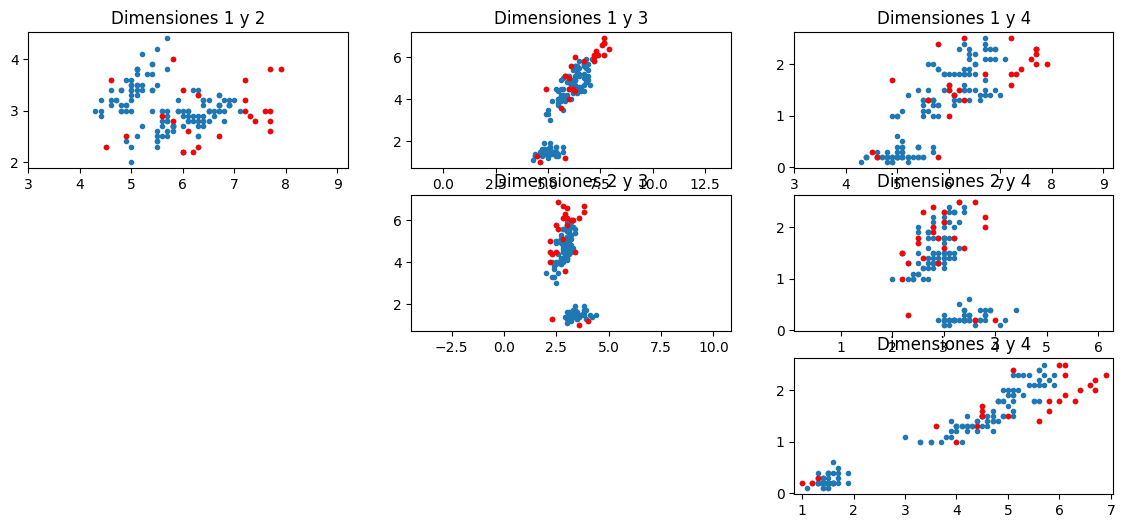

In [35]:
# Mostramos las combinaciones de dimensiones 2 a 2

ii = (y_train_scores==-1)

plt.figure(figsize=(14,6))
plt.subplot(3,3,1), plt.plot(X[:,0],X[:,1],'.'), plt.title('Dimensiones 1 y 2')
plt.subplot(3,3,1), plt.plot(X[ii,0],X[ii,1],'r.'), plt.title('Dimensiones 1 y 2')
plt.axis('equal')
plt.subplot(3,3,2), plt.plot(X[:,0],X[:,2],'.'), plt.title('Dimensiones 1 y 3')
plt.subplot(3,3,2), plt.plot(X[ii,0],X[ii,2],'r.'), plt.title('Dimensiones 1 y 3')
plt.axis('equal')
plt.subplot(3,3,3), plt.plot(X[:,0],X[:,3],'.'), plt.title('Dimensiones 1 y 4')
plt.subplot(3,3,3), plt.plot(X[ii,0],X[ii,3],'r.'), plt.title('Dimensiones 1 y 4')
plt.axis('equal')
plt.subplot(3,3,5), plt.plot(X[:,1],X[:,2],'.'), plt.title('Dimensiones 2 y 3')
plt.subplot(3,3,5), plt.plot(X[ii,1],X[ii,2],'r.'), plt.title('Dimensiones 2 y 3')
plt.axis('equal')
plt.subplot(3,3,6), plt.plot(X[:,1],X[:,3],'.'), plt.title('Dimensiones 2 y 4')
plt.subplot(3,3,6), plt.plot(X[ii,1],X[ii,3],'r.'), plt.title('Dimensiones 2 y 4')
plt.axis('equal')
plt.subplot(3,3,9), plt.plot(X[:,2],X[:,3],'.'), plt.title('Dimensiones 3 y 4')
plt.subplot(3,3,9), plt.plot(X[ii,2],X[ii,3],'r.'), plt.title('Dimensiones 3 y 4')
plt.axis('equal')

## LOF


In [40]:
# aplica el algoritmo LOF

lof = LOF(novelty=True)
lof.fit(X)
y_predict = -lof.score_samples(X)
y_predict

array([0.96407398, 1.01382239, 1.01314683, 1.04935107, 0.95840654,
       1.13633326, 1.01570946, 0.95332702, 1.17575647, 0.96513346,
       1.02060435, 0.95559316, 1.0238613 , 1.30265175, 1.44290852,
       1.62527873, 1.13594374, 0.96433078, 1.21853814, 0.99920563,
       1.02263957, 0.99331563, 1.25908115, 0.99291034, 1.07035006,
       0.98342897, 0.97110989, 0.9762067 , 0.9701132 , 0.99487126,
       0.98007756, 0.99439999, 1.19158924, 1.33695413, 0.96932372,
       0.97709153, 1.05898883, 0.94739695, 1.13307051, 0.97073975,
       0.95492337, 1.72688101, 1.12085476, 1.01470344, 1.12887381,
       1.0217648 , 1.00036007, 1.03910797, 1.00402433, 0.95874088,
       1.19706322, 0.99875837, 1.07352295, 1.01357421, 0.98444601,
       0.95308794, 0.97690486, 1.40093333, 1.01140851, 1.02450319,
       1.36558743, 0.95582849, 1.06780555, 0.95546018, 1.0220395 ,
       1.06917541, 0.99621763, 0.97832046, 1.12670116, 0.99531698,
       0.9972623 , 0.98315164, 0.98592094, 0.96998408, 0.99940

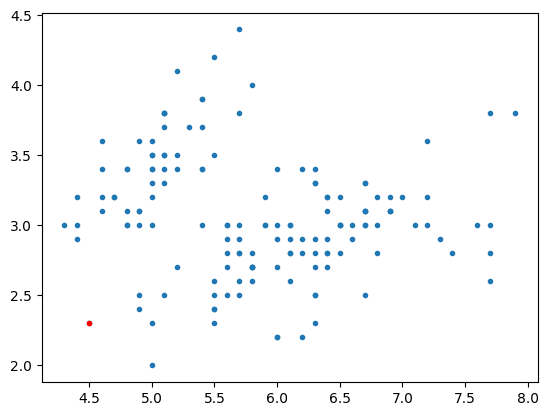

In [41]:
# EJERCICIO: mostramos varias anomalias

an = np.argmax(y_predict)

plt.plot(X[:,0], X[:,1],'.')
plt.plot(X[an,0], X[an,1], 'r.')
plt.show()

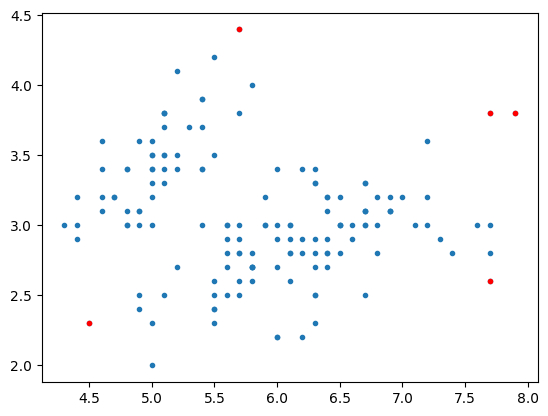

In [42]:
N = 5

lista_an = np.argsort(-y_predict)[:N]

plt.plot(X[:,0], X[:,1],'.')
plt.plot(X[lista_an,0], X[lista_an,1], 'r.')
plt.show()

# Pyod

Aquí los algorimtos están preparados para ver anomalías (son los del paper).

In [43]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.2-py3-none-any.whl size=190292 sha256=98d8b91cfd95067b1ba00a22d5ffd9da8b65814e14facd4374424672aa3f74d1
  Stored in directory: /root/.cache/pip/wheels/81/1b/61/aa85b78c3c0c8871f4231e3f4a03bb23cecb7db829498380ee
Successfully built pyod


In [44]:
from pyod.models.iforest import IForest
from pyod.models.lof import LOF
from pyod.models.gmm import GMM

In [46]:
# evaluamos los algoritmos de pyod en iris

clf_LOF = LOF(novelty=True).fit(X)
y_predict_LOF = clf_LOF.decision_function(X)

clf_IForest = IForest().fit(X)
y_predict_IF = clf_IForest.decision_function(X)
y_predict_IF


array([-0.13734624, -0.11414566, -0.10081402, -0.08875135, -0.1243489 ,
       -0.03143065, -0.06275086, -0.14108327, -0.02409195, -0.07341782,
       -0.08977817, -0.11785407, -0.07301084,  0.05471062,  0.04606263,
        0.08331613, -0.03467829, -0.12011306, -0.00312519, -0.0941869 ,
       -0.06511867, -0.09243046,  0.02693116, -0.05688729, -0.05024659,
       -0.09919816, -0.09860054, -0.11896457, -0.11355179, -0.0941648 ,
       -0.10654955, -0.06704457, -0.00211814,  0.01166534, -0.11860273,
       -0.09514431, -0.06112509, -0.07367094, -0.05112703, -0.13887736,
       -0.09885517,  0.07295808, -0.04872132, -0.05028527, -0.02506151,
       -0.07446135, -0.09027302, -0.1038566 , -0.09303831, -0.13102723,
       -0.05365573, -0.10499777, -0.09121584, -0.06021982, -0.12612588,
       -0.13501932, -0.08650819, -0.01944722, -0.1084637 , -0.04323447,
        0.0525782 , -0.11269892, -0.0112027 , -0.1428623 , -0.09142199,
       -0.09056188, -0.12345125, -0.0718046 , -0.03343903, -0.08

In [49]:

# pintamos los 5 más anómalos
N = 5

ii_LOF = np.argsort(-y_predict_LOF)[:N]
ii_IForest = np.argsort(-y_predict_IF)[:N]

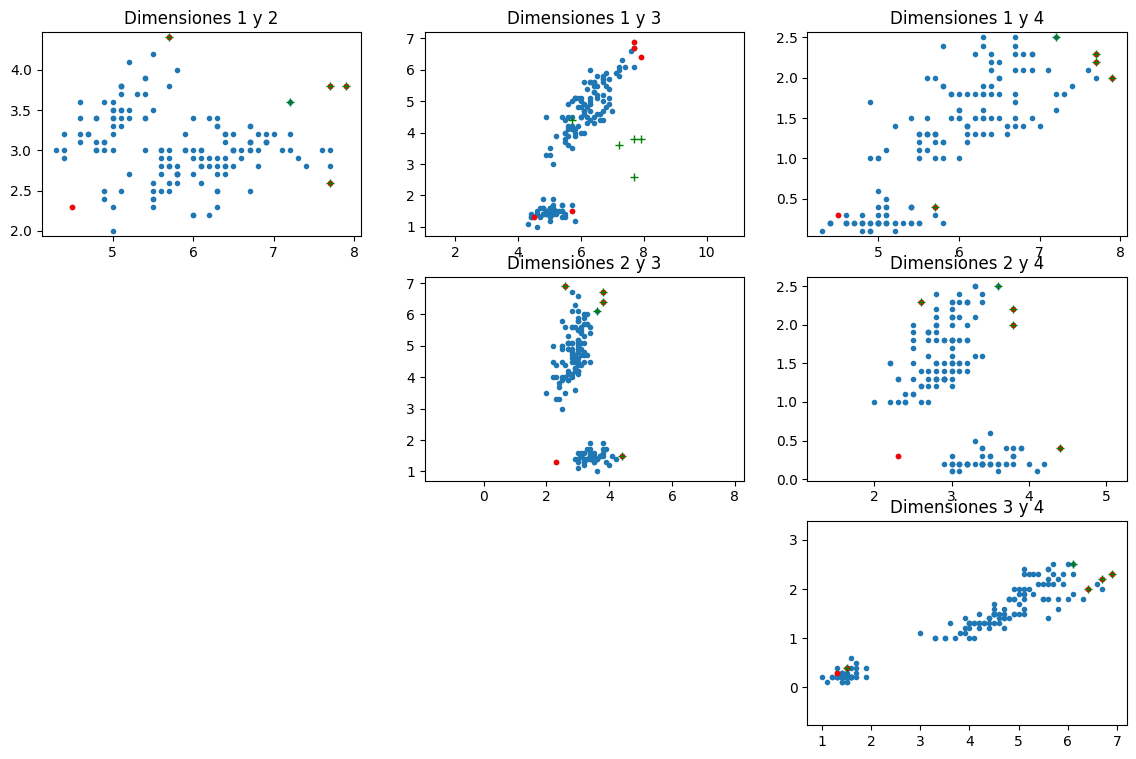

In [51]:
# Mostramos las combinaciones de dimensiones 2 a 2
plt.figure(figsize=(14,9))
plt.subplot(3,3,1), plt.plot(X[:,0],X[:,1],'.'), plt.title('Dimensiones 1 y 2')
plt.subplot(3,3,1), plt.plot(X[ii_LOF,0],X[ii_LOF,1],'r.'), plt.title('Dimensiones 1 y 2')
plt.subplot(3,3,1), plt.plot(X[ii_IForest,0],X[ii_IForest,1],'g+'), plt.title('Dimensiones 1 y 2')
plt.axis('equal')
plt.subplot(3,3,2), plt.plot(X[:,0],X[:,2],'.'), plt.title('Dimensiones 1 y 3')
plt.subplot(3,3,2), plt.plot(X[ii_LOF,0],X[ii_LOF,2],'r.'), plt.title('Dimensiones 1 y 3')
plt.subplot(3,3,2), plt.plot(X[ii_IForest,0],X[ii_IForest,1],'g+'), plt.title('Dimensiones 1 y 3')
plt.axis('equal')
plt.subplot(3,3,3), plt.plot(X[:,0],X[:,3],'.'), plt.title('Dimensiones 1 y 4')
plt.subplot(3,3,3), plt.plot(X[ii_LOF,0],X[ii_LOF,3],'r.'), plt.title('Dimensiones 1 y 4')
plt.subplot(3,3,3), plt.plot(X[ii_IForest,0],X[ii_IForest,3],'g+'), plt.title('Dimensiones 1 y 4')
plt.axis('equal')
plt.subplot(3,3,5), plt.plot(X[:,1],X[:,2],'.'), plt.title('Dimensiones 2 y 3')
plt.subplot(3,3,5), plt.plot(X[ii_LOF,1],X[ii_LOF,2],'r.'), plt.title('Dimensiones 2 y 3')
plt.subplot(3,3,5), plt.plot(X[ii_IForest,1],X[ii_IForest,2],'g+'), plt.title('Dimensiones 2 y 3')
plt.axis('equal')
plt.subplot(3,3,6), plt.plot(X[:,1],X[:,3],'.'), plt.title('Dimensiones 2 y 4')
plt.subplot(3,3,6), plt.plot(X[ii_LOF,1],X[ii_LOF,3],'r.'), plt.title('Dimensiones 2 y 4')
plt.subplot(3,3,6), plt.plot(X[ii_IForest,1],X[ii_IForest,3],'g+'), plt.title('Dimensiones 2 y 4')
plt.axis('equal')
plt.subplot(3,3,9), plt.plot(X[:,2],X[:,3],'.'), plt.title('Dimensiones 3 y 4')
plt.subplot(3,3,9), plt.plot(X[ii_LOF,2],X[ii_LOF,3],'r.'), plt.title('Dimensiones 3 y 4')
plt.subplot(3,3,9), plt.plot(X[ii_IForest,2],X[ii_IForest,3],'g+'), plt.title('Dimensiones 3 y 4')
plt.axis('equal')
plt.show()